# Kohonen Map for NLP tasks

TBD 

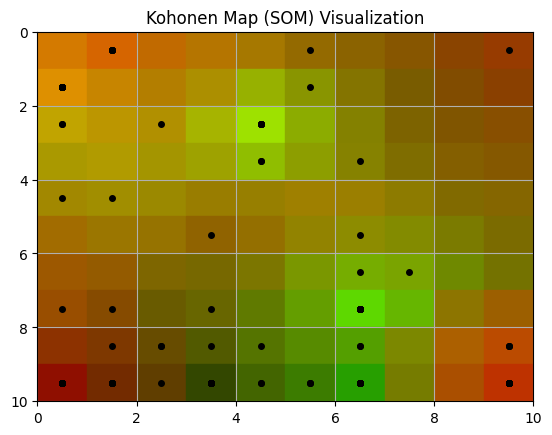

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Generate sample data: 3 Gaussian blobs
data = np.vstack([
    np.random.randn(100, 2) * 0.5 + np.array([0, 0]),
    np.random.randn(100, 2) * 0.5 + np.array([0.5, 0]),
    np.random.randn(100, 2) * 0.5 + np.array([0, 0.5]),
])

# Normalize the data:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Initialize and train the SOM
x_dim, y_dim = 10, 10
som = MiniSom(x=x_dim, y=y_dim, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_normalized)
som.train(data_normalized, 1000, verbose=False) # Training for 1000 iterations

# Create a grid with color-coded neurons
for i in range(x_dim):
    for j in range(y_dim):
        weight = som.get_weights()[i, j]
        # Use the weight as a color (2D data padded to RGB)
        color = np.append(weight, [0]) if len(weight) == 2 else weight
        color = np.clip(color, 0, 1)
        plt.fill_between([i, i+1], [j, j], [j+1, j+1], color=color)

# Plot mapped data points
for sample in data:
    w = som.winner(sample)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ko', markersize=4)

plt.title('Kohonen Map (SOM) Visualization')
plt.xlim(0, x_dim)
plt.ylim(0, y_dim)
plt.gca().invert_yaxis()
plt.grid(True, which='both')
plt.show()
